# Visualizing Distributions

### Build a line

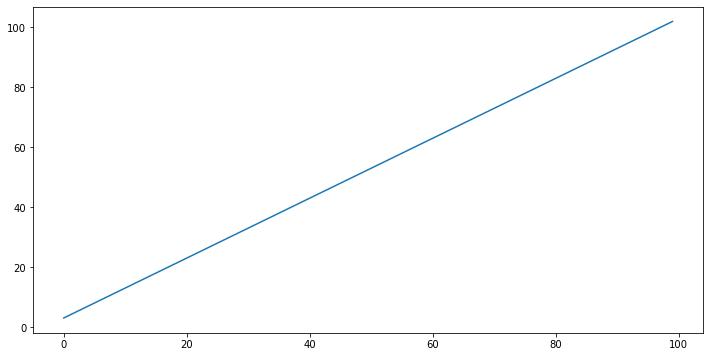

In [1]:
import numpy as np
import matplotlib.pyplot as plt

line = np.array([i + 3 for i in range(100)])
figure = plt.figure(figsize = (12,6))
plt.plot(line)

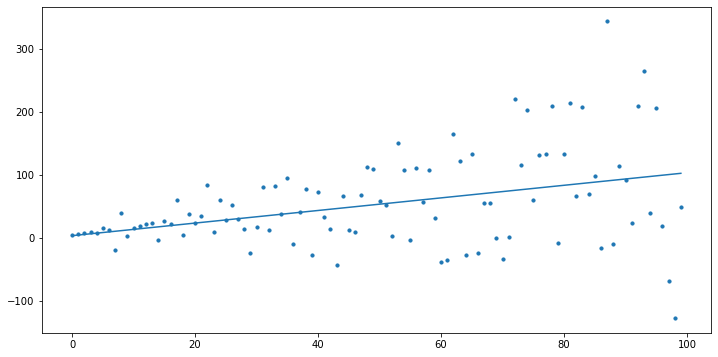

In [2]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, point))
    
    

figure = plt.figure(figsize = (12,6))
plt.plot(line)
plt.scatter(x = np.arange(len(points)), y = points, s = 10)



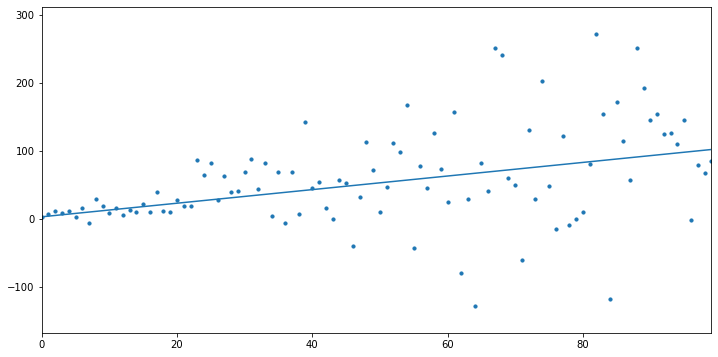

In [3]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, point))
    
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.1

figure = plt.figure(figsize = (12,6))
plt.plot(line)
plt.scatter(x = np.arange(len(points)), y = points, s = 10)

Text(0.5, 1.0, 'Randomly Generated Points')

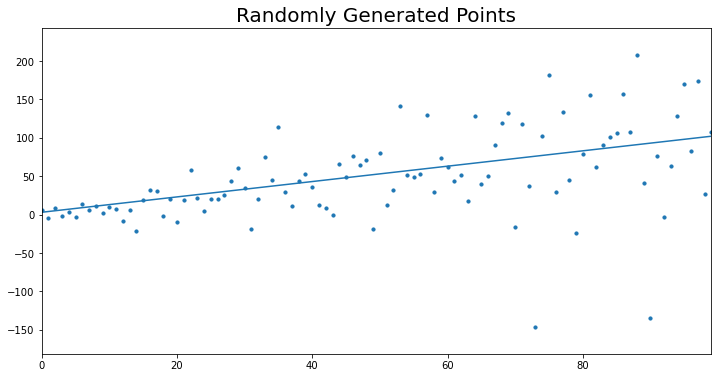

In [4]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, point))
    
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.1

figure = plt.figure(figsize = (12,6))
plt.plot(line)
plt.scatter(x = np.arange(len(points)), y = points, s = 10)
plt.title("Randomly Generated Points", fontsize = 20)

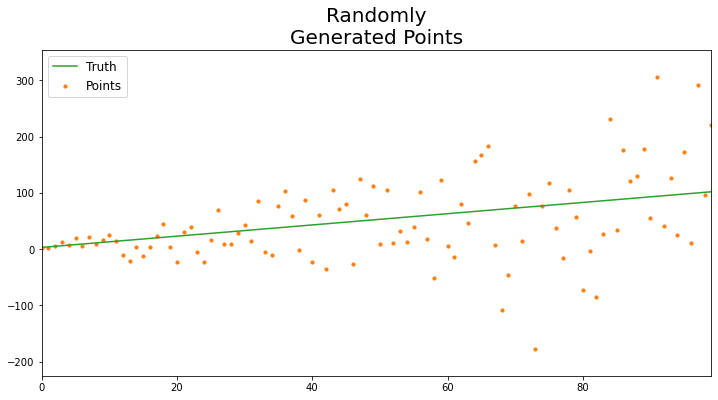

In [5]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, point))
    
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.1

figure = plt.figure(figsize = (12,6))
plt.plot(line, label  = "Truth", color = "C12")
plt.scatter(x = np.arange(len(points)), y = points, s = 10, label = "Points", color = "C1")
plt.title("Randomly\nGenerated Points", fontsize = 20)
plt.legend(fontsize = 12, loc="best")

## Monte Carlo Simulation

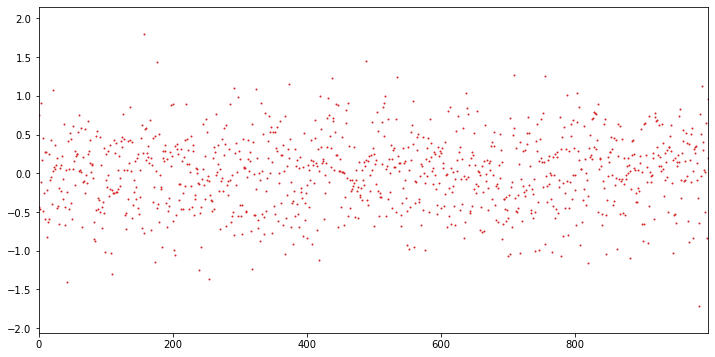

In [6]:
#build list of points drawn from a standard normal distribution and plot it in a figure

random_list = []
sim_length = 1000
mean = 0
sigma = 0.5

for i in range(sim_length):
    random_list.append(random.normalvariate(mean, sigma))
figure = plt.figure(figsize = (12,6))
plt.plot(random_list, ls = "", marker = ".", markersize = 2, color = "C3")
plt.show()
plt.close()

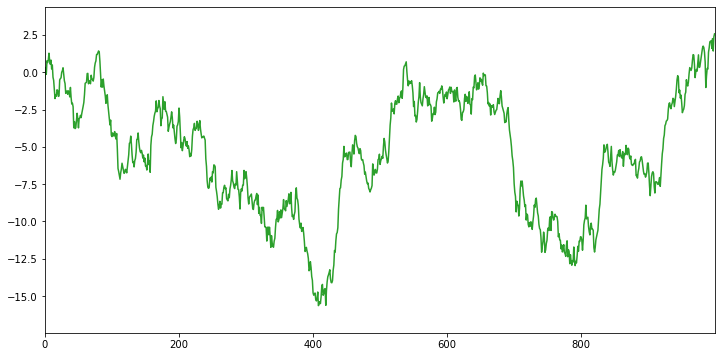

In [7]:
simulation = []

for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        simulation.append(simulation[i - 1] + val)

figure = plt.figure(figsize = (12,6))
plt.plot(simulation, color = "C2")
plt.show()
plt.close()

## Dr Caton, I reduced the number of simulations and periods for faster and save space to be able to upload on github. I was initially struggling to upload due to the size.

In [8]:
monte_carlo_sim_dict = {}
num_sims = 500
periods = 200
for i in range(num_sims):
    monte_carlo_sim_dict[i] = {}
    for period in range(periods):
        
        #create variable for current simulation
        curr_sim = monte_carlo_sim_dict[i]
        if period == 0:
            curr_sim[period] = random.normalvariate(mean, sigma)
        else:
            curr_sim[period] = curr_sim[period - 1] + random.normalvariate(mean, sigma)
monte_carlo_sim_dict

{0: {0: 0.25788070375268385,
  1: -0.05815155874224953,
  2: -0.23870079151609203,
  3: -0.42413648849363234,
  4: 0.5886723290225735,
  5: -0.23815638838463604,
  6: -0.3663467061590603,
  7: -0.9414520926445848,
  8: -0.5070396870357827,
  9: -0.9501067186648717,
  10: -1.2071954002413154,
  11: -0.901044321201249,
  12: -1.7225086746678446,
  13: -2.1037823967123783,
  14: -2.1879233231545334,
  15: -2.906525932722387,
  16: -2.8074280538173264,
  17: -1.9668214975733707,
  18: -2.4173401768096654,
  19: -1.5119541366761073,
  20: -0.6122058335989908,
  21: -0.8071482389397071,
  22: -0.6449650001057883,
  23: -0.5303775265923808,
  24: -0.416613419698826,
  25: 0.289512184539131,
  26: -0.19204586637719678,
  27: -0.7560279236911437,
  28: -0.8112962466801735,
  29: -1.440790449595395,
  30: -0.7655014506565078,
  31: -0.09293843139743896,
  32: -0.12949197776162757,
  33: 0.12948800860889587,
  34: 1.0400981103903906,
  35: 0.33936624227337975,
  36: -0.5513110628094776,
  37: -1.

In [9]:
import pandas as pd

monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict)

<AxesSubplot:>

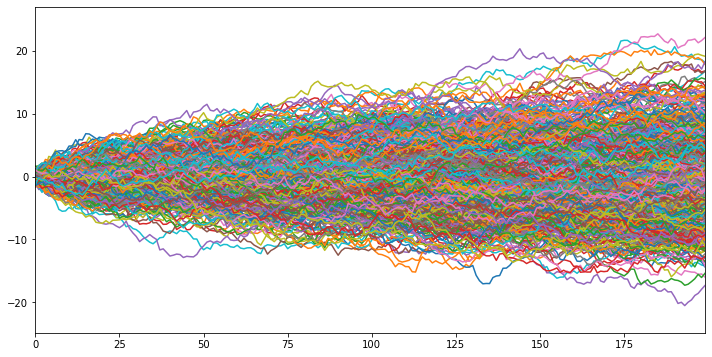

In [10]:
fig, ax = plt.subplots(figsize = (12,6))
monte_carlo_sim_df.plot.line(legend = False, ax = ax)

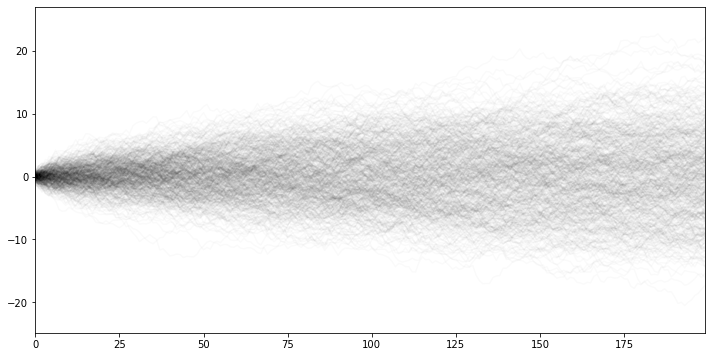

In [11]:
fig, ax = plt.subplots(figsize = (12,6))
monte_carlo_sim_df.plot.line(legend = False,
                             color = "k",
                             alpha = .02,                       
                             ax = ax)

plt.show()
plt.close()

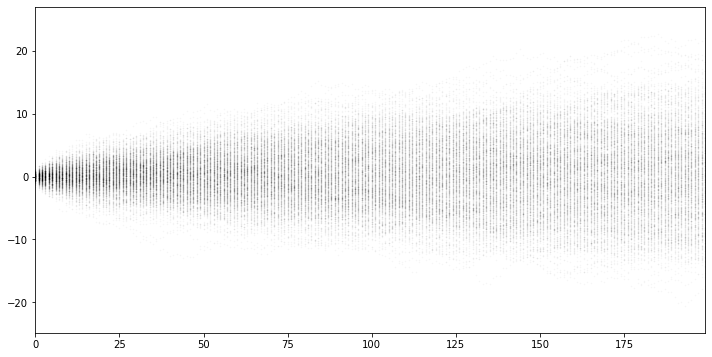

In [12]:
fig, ax = plt.subplots(figsize = (12,6))
monte_carlo_sim_df.plot.line(legend = False,
                             ls = "",
                             marker = ".",
                             markersize = 2,
                             color = "k",
                             alpha = .02,                       
                             ax = ax)

plt.show()
plt.close()

In [13]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

#the use of _ after the 2nd mean is telling the system its a variable name not the same as the function

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    if n % 2 !=0:
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
    return median_


def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n-1)
        
    return variance_

def SD(list_obj, sample = False):
    SD_ = variance(list_obj) ** 1/2
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    #instantiate(express) a variable holding the value of 0:
    #this will be used to sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    #the list lenght must be equal hence check
    if n1 == n2:
        n = n1
        #sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        #account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        #return covariance
        return cov
    else:
        print("List lenghts are not equal")
        print("List1:", n1)
        print("List2:", n1)
        
def correlation (list_obj1, list_obj2):
    # correlation(x,y) = cov(x,y) / (SD(x) 8 SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n* skew / ((n-1)*(n-2) * SD_ ** 3)
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [14]:
lst = [1,2,3,4,5,6,7,8,9]

print("total:", total(lst))
print("mean:", mean(lst))
print("median:", median(lst))
print("varance:", variance(lst, sample = False))
print("variance (sample):", variance(lst, sample = True))

lst2 = [5,23,7,5,3,2,1,3,4]

print("Covariance:", covariance(lst, lst2, sample = False))
print("Covariance: (sample)", covariance(lst, lst2, sample = True))

print("SD1:", SD(lst, sample = False))
print("SD1: (sample)", SD(lst, sample = True))

print("SD2:", SD(lst2, sample = False))
print("SD2: (sample)", SD(lst2, sample = True))

print("correlation:", correlation(lst, lst2))
print("skewness:", skewness(lst, sample = False))
print("skewness: (sample)", skewness(lst, sample = True))

print("kurtosis:", kurtosis(lst, sample = False))
print("kurtosis: (sample)", kurtosis(lst, sample = True))

total: 45
mean: 5.0
median: 5
varance: 6.666666666666667
variance (sample): 7.5
Covariance: -8.777777777777777
Covariance: (sample) -9.874999999999998
SD1: 3.3333333333333335
SD1: (sample) 3.3333333333333335
SD2: 19.716049382716047
SD2: (sample) 19.716049382716047
correlation: -0.13356293049467752
skewness: 0.0
skewness: (sample) 0.0
kurtosis: 0.6371999999999999
kurtosis: (sample) -3.0353214285714287


In [15]:
import pandas as pd

def gather_statistics(df, sample = False):
    #create a dictionary of dictionaries with an entry for each column of data in a dataframe, df
    dct = {key:{} for key in df}
    #call each column of data and its name (key)
    #df.items() makes a list of tuples where tuple index 0 refers to the key, index 1 refers to object pointed to by key
    for key, val in df.items():
        # inplace = True alters the object itself
        val.dropna(axis=0, inplace = True)
        dct[key]["mean"] = round(mean(val), 3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val, sample), 3)
        dct[key]["SD"] = round(SD(val, sample), 3)
        dct[key]["skewness"] = round(skewness(val, sample), 3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample), 3)
    
    stats_df = pd.DataFrame(dct)
    return stats_df

In [16]:
# this allows you to download and install without opening your 

!pip install pandas-datareader

In [17]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

print(start, end)

2012-01-01 00:00:00 2021-10-05 12:01:05.851522


In [18]:
data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for key in stocks:
    data_dict[key] = web.DataReader(key, "yahoo", start, end)

In [19]:
#becareful not to download data twice or multiple times.

data_dict[key]

High         Low        Open       Close      Volume  \
Date                                                                     
2012-01-03    5.900000    5.530000    5.788000    5.616000   4640500.0   
2012-01-04    5.734000    5.500000    5.642000    5.542000   3150500.0   
2012-01-05    5.586000    5.370000    5.552000    5.424000   5027500.0   
2012-01-06    5.558000    5.282000    5.440000    5.382000   4931500.0   
2012-01-09    5.498000    5.224000    5.400000    5.450000   4485000.0   
...                ...         ...         ...         ...         ...   
2021-09-29  793.500000  770.679993  779.799988  781.309998  20942900.0   
2021-09-30  789.130005  775.000000  781.000000  775.479980  17956000.0   
2021-10-01  780.780029  763.590027  778.400024  775.219971  17031400.0   
2021-10-04  806.969971  776.119995  796.500000  781.530029  30437900.0   
2021-10-05  797.309998  777.098022  784.796204  777.460022  12247479.0   

             Adj Close  
Date                    
2012-01-03    5.616000  
2012-01-04    5.542000  
2012-01-05    5.424000  
2012-01-06    5.382000  
2012-01-09    5.450000  
...                ...  
2021-09-29  781.309998  
2021-09-30  775.479980  
2021-10-01  775.219971  
2021-10-04  781.530029  
2021-10-05  777.460022  

[2456 rows x 6 columns]

In [20]:
data_dict.keys()

dict_keys(['MSFT', 'AAPL', 'FB', 'TSLA'])

In [21]:
data_dict.values()

dict_values([                  High         Low        Open       Close      Volume  \
Date                                                                     
2012-01-03   26.959999   26.389999   26.549999   26.770000  64731500.0   
2012-01-04   27.469999   26.780001   26.820000   27.400000  80516100.0   
2012-01-05   27.730000   27.290001   27.379999   27.680000  56081400.0   
2012-01-06   28.190001   27.530001   27.530001   28.110001  99455500.0   
2012-01-09   28.100000   27.719999   28.049999   27.740000  59706800.0   
...                ...         ...         ...         ...         ...   
2021-09-29  286.769989  283.010010  285.100006  284.000000  26353700.0   
2021-09-30  287.829987  281.619995  285.709991  281.920013  32325800.0   
2021-10-01  289.980011  281.290009  282.119995  289.100006  30086300.0   
2021-10-04  287.750000  280.250000  287.399994  283.109985  31322900.0   
2021-10-05  289.980011  284.046387  284.045990  289.700012  12621422.0   

             Adj Close  

In [22]:
for val in data_dict.values():
    print(val["Close"])

Date
2012-01-03     26.770000
2012-01-04     27.400000
2012-01-05     27.680000
2012-01-06     28.110001
2012-01-09     27.740000
                 ...    
2021-09-29    284.000000
2021-09-30    281.920013
2021-10-01    289.100006
2021-10-04    283.109985
2021-10-05    289.700012
Name: Close, Length: 2456, dtype: float64
Date
2012-01-03     14.686786
2012-01-04     14.765714
2012-01-05     14.929643
2012-01-06     15.085714
2012-01-09     15.061786
                 ...    
2021-09-29    142.830002
2021-09-30    141.500000
2021-10-01    142.649994
2021-10-04    139.139999
2021-10-05    141.860001
Name: Close, Length: 2456, dtype: float64
Date
2012-05-18     38.230000
2012-05-21     34.029999
2012-05-22     31.000000
2012-05-23     32.000000
2012-05-24     33.029999
                 ...    
2021-09-29    339.609985
2021-09-30    339.390015
2021-10-01    343.010010
2021-10-04    326.230011
2021-10-05    332.234985
Name: Close, Length: 2361, dtype: float64
Date
2012-01-03      5.616000
2012

In [23]:
close_data = pd.concat((df["Close"] for df in data_dict.values()),
                       keys = data_dict.keys(),
                       axis = 1) # this part of the code led to the horizontal position of the different stocks
close_data

MSFT        AAPL          FB        TSLA
Date                                                      
2012-01-03   26.770000   14.686786         NaN    5.616000
2012-01-04   27.400000   14.765714         NaN    5.542000
2012-01-05   27.680000   14.929643         NaN    5.424000
2012-01-06   28.110001   15.085714         NaN    5.382000
2012-01-09   27.740000   15.061786         NaN    5.450000
...                ...         ...         ...         ...
2021-09-29  284.000000  142.830002  339.609985  781.309998
2021-09-30  281.920013  141.500000  339.390015  775.479980
2021-10-01  289.100006  142.649994  343.010010  775.219971
2021-10-04  283.109985  139.139999  326.230011  781.530029
2021-10-05  289.700012  141.860001  332.234985  777.460022

[2456 rows x 4 columns]

### Pandas has built in matplotlib extension.

Text(0.5, 1.0, 'Close\nDaily Stock Prices ')

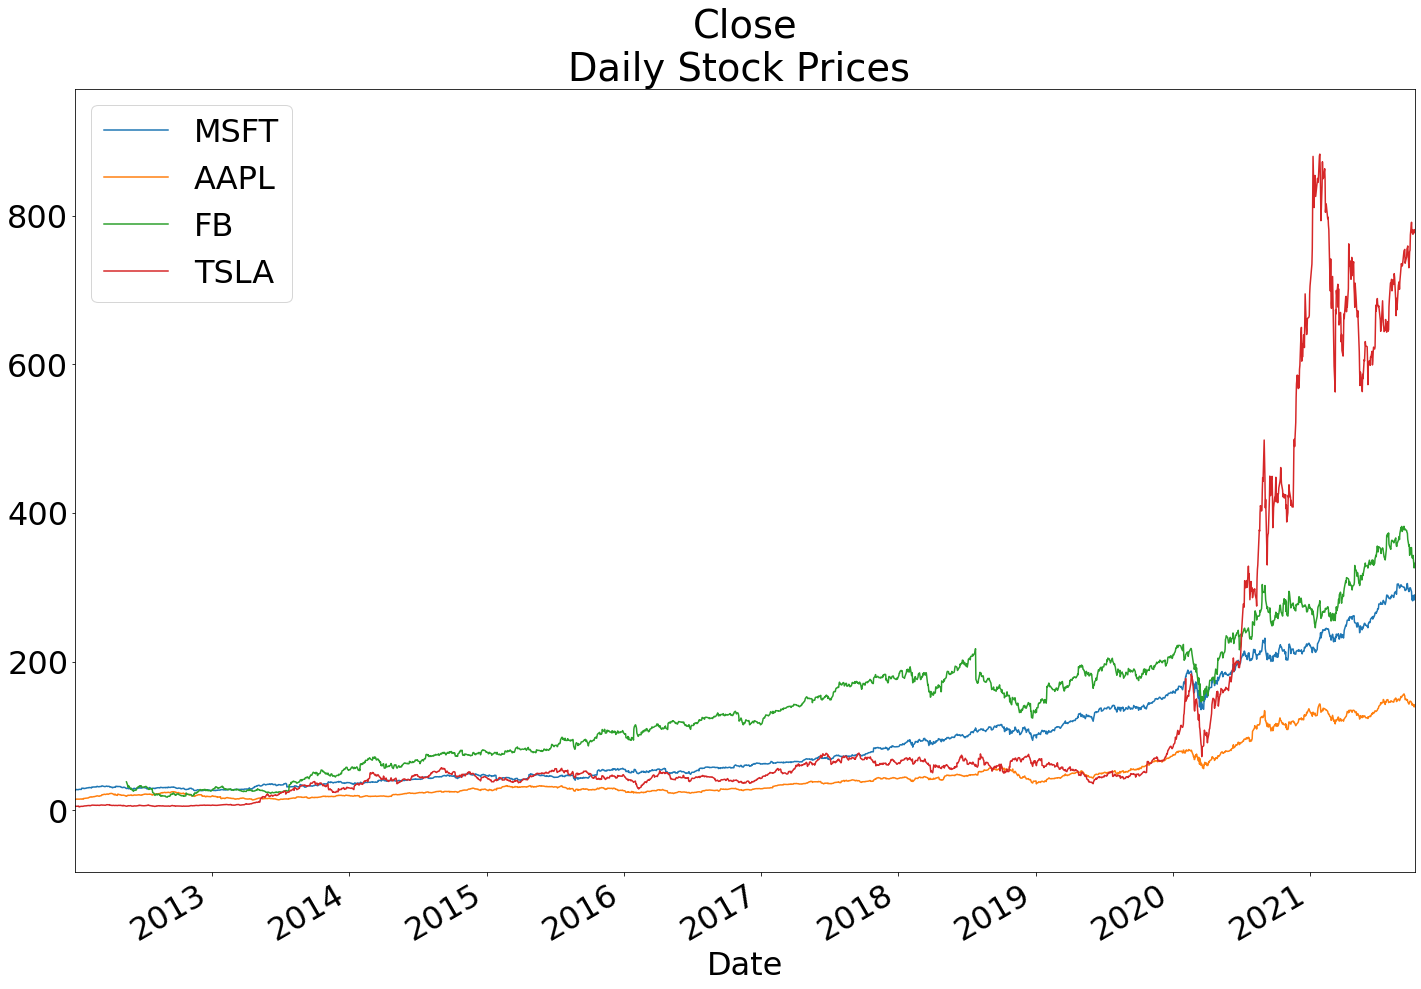

In [24]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Close\nDaily Stock Prices ")

### it is helpful to log the yaxis to view change in terms of proportion

<ipython-input-25-e8b21aea85b7>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])


[Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000')]

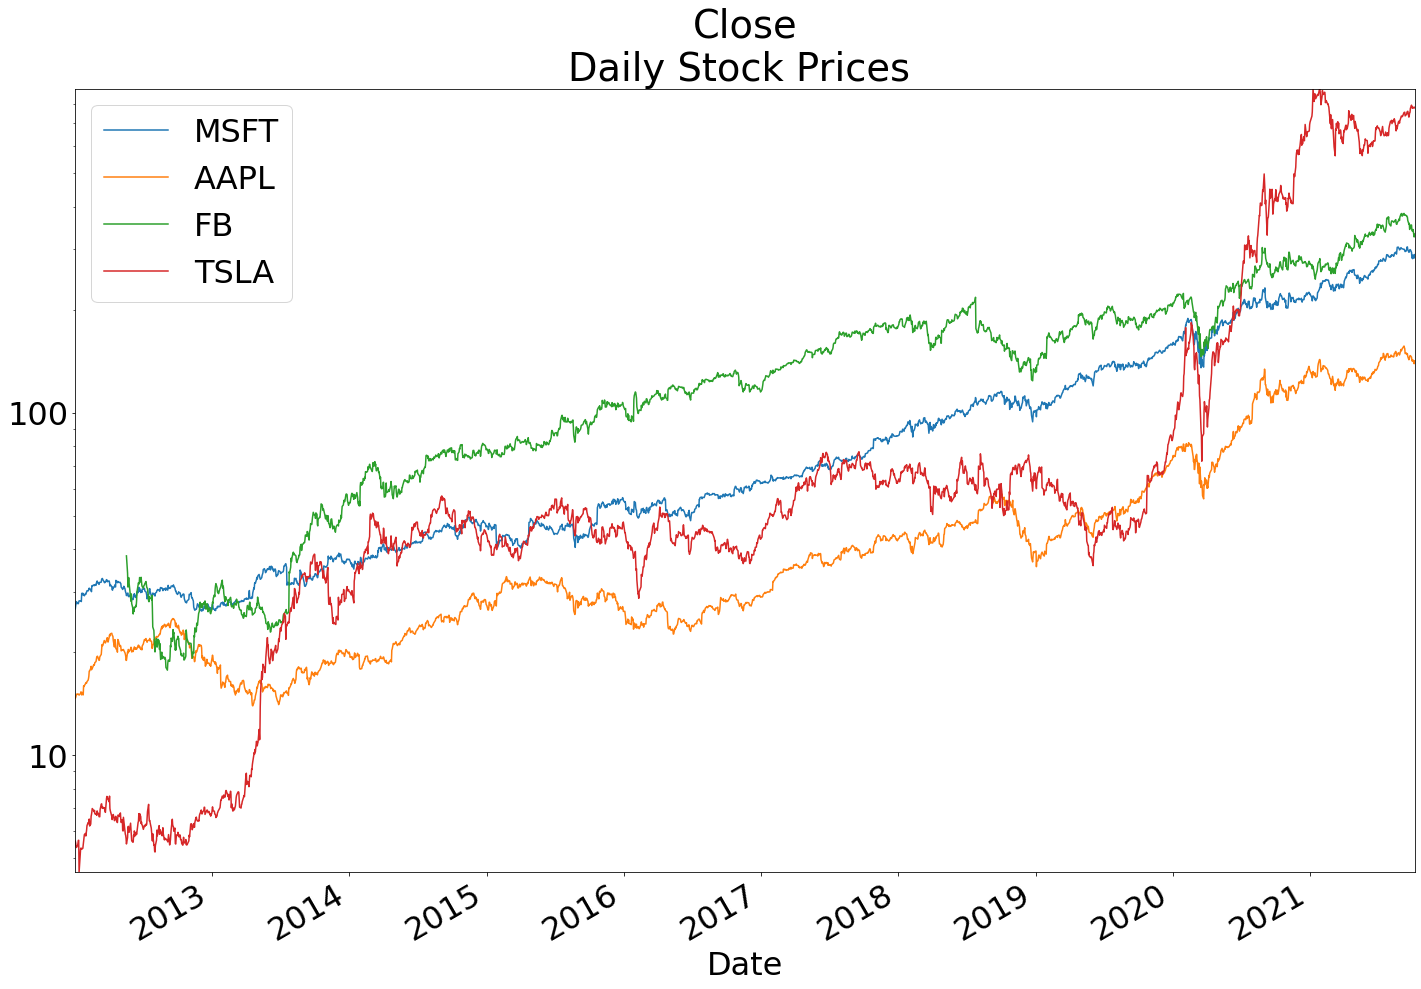

In [25]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})

# this takes out the extra spaces at the margins to make the plots look better
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Close\nDaily Stock Prices ")
ax.set_yscale("log")

#this will change the y ticklabels so that we do not get scientific notations in logs
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])

## Transforming Data (% change)

the change in percent helpd to make meaning comparison within obervations

In [26]:
price_change_data = close_data.pct_change() * 100
price_change_data

MSFT      AAPL        FB      TSLA
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  2.353377  0.537408       NaN -1.317670
2012-01-05  1.021900  1.110200       NaN -2.129196
2012-01-06  1.553469  1.045381       NaN -0.774333
2012-01-09 -1.316261 -0.158618       NaN  1.263468
...              ...       ...       ...       ...
2021-09-29  0.169304  0.648297 -0.305301  0.482278
2021-09-30 -0.732390 -0.931178 -0.064772 -0.746185
2021-10-01  2.546819  0.812717  1.066618 -0.033529
2021-10-04 -2.071955 -2.460564 -4.891985  0.813970
2021-10-05  2.327727  1.954866  1.840718 -0.520774

[2456 rows x 4 columns]

<ipython-input-27-4f56efcb893e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


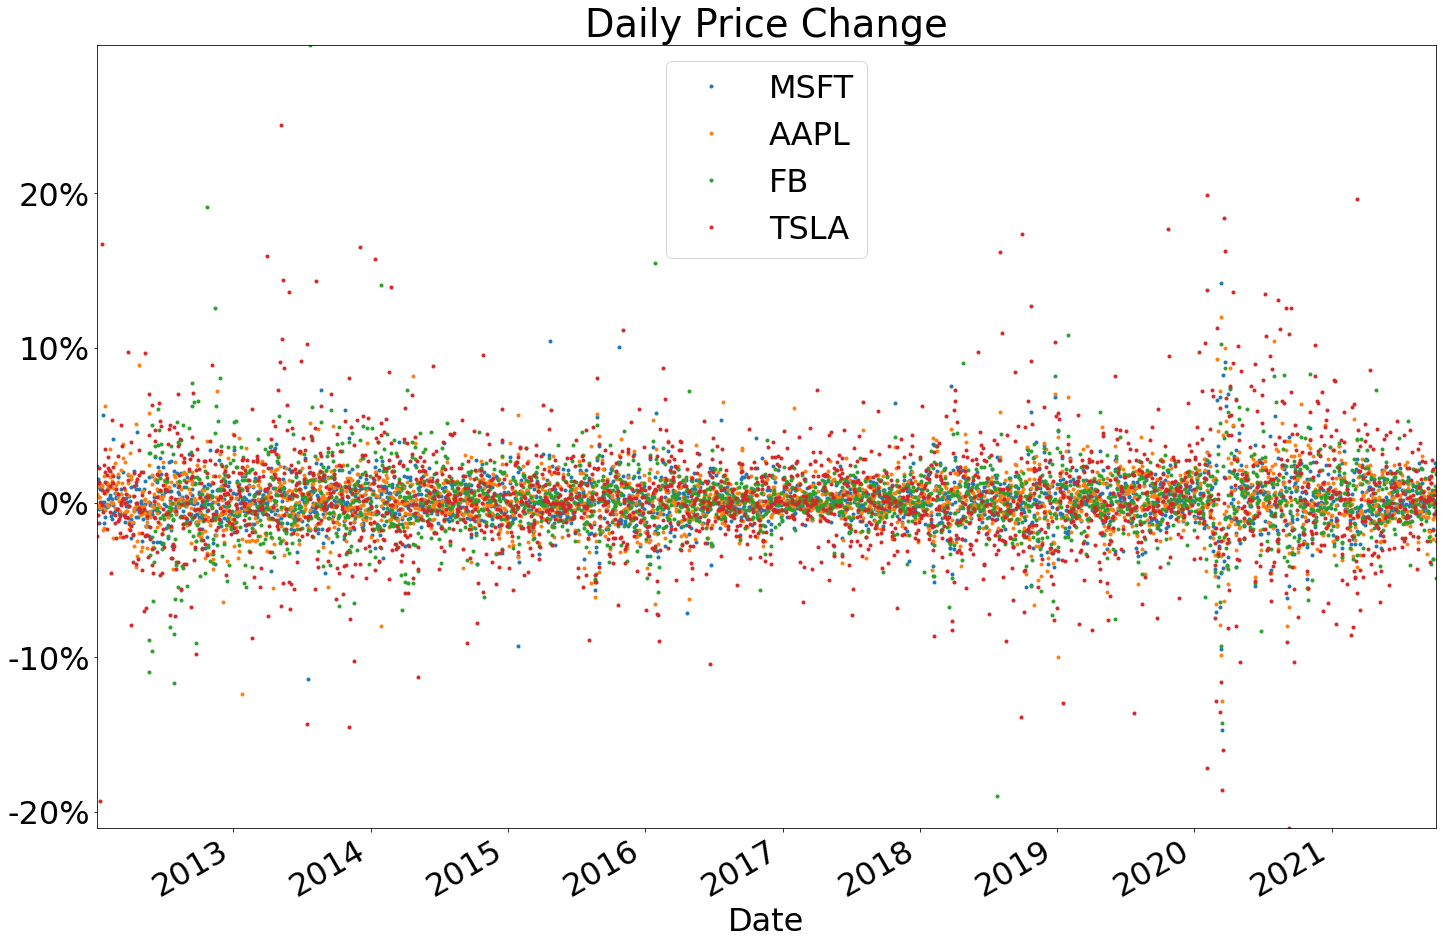

In [27]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].plot.line(ls = "", marker = ".",
                                    ax = ax,
                                    legend = True)
plt.title("Daily Price Change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])

plt.show()
plt.close()

In [28]:
stats_df = gather_statistics(price_change_data, sample = True)
stats_df

MSFT    AAPL     FB    TSLA
mean       0.110   0.109  0.118   0.262
median     0.069   0.081  0.105   0.131
variance   2.600   3.219  5.381  12.248
SD         1.299   1.609  2.689   6.121
skewness   0.087  -0.166  0.603   0.081
kurtosis  29.534  11.587  8.916  -2.014

<ipython-input-29-f8e492c9fac4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])


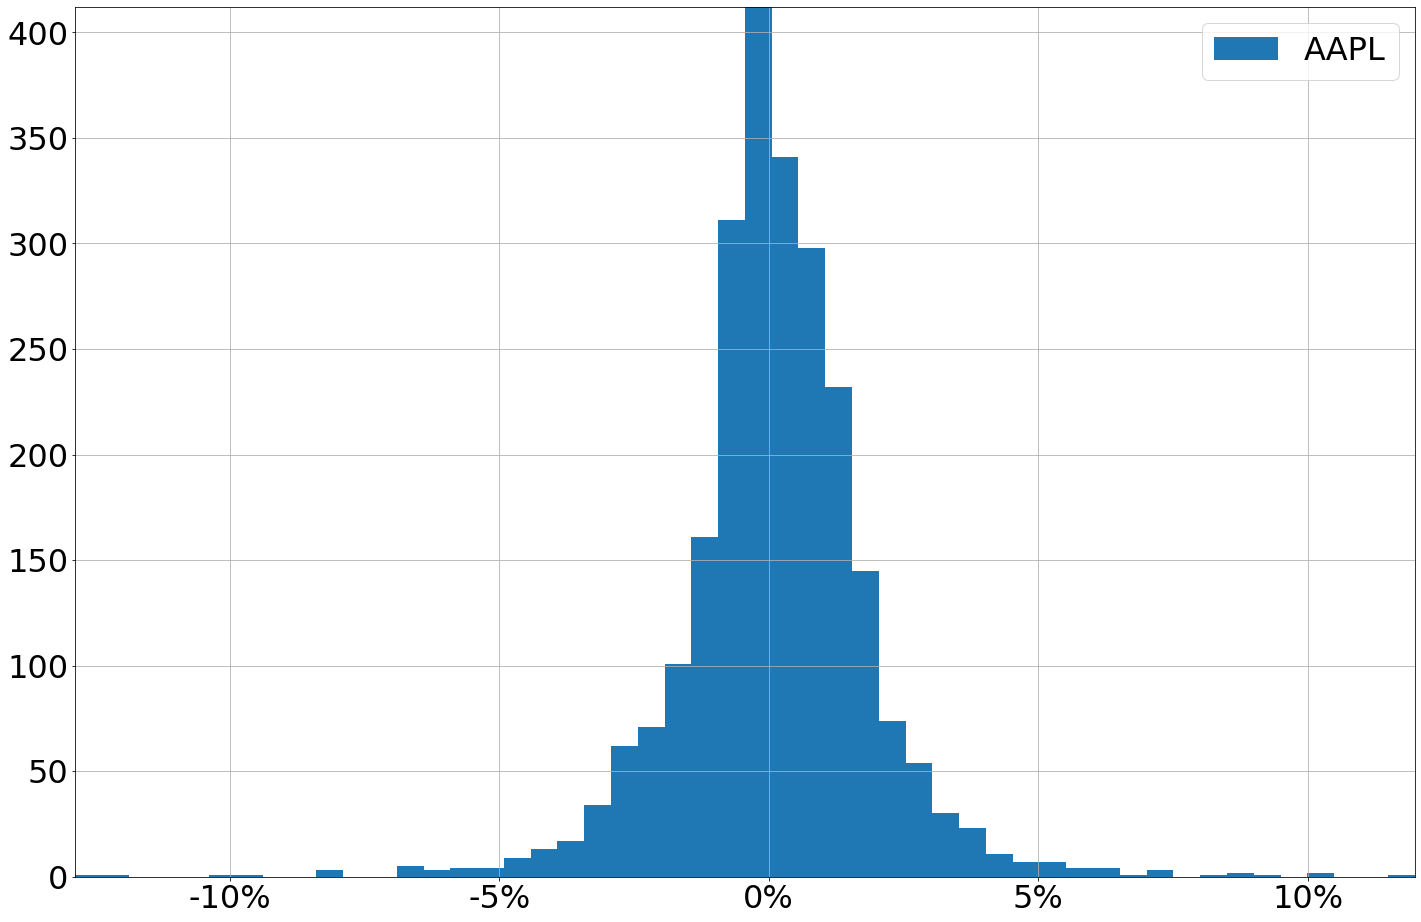

In [29]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")

#set the horizntal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
plt.legend()
plt.show()

### converting the histogram with counts to a density which will use the %

<ipython-input-30-a3ca4211e799>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-30-a3ca4211e799>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


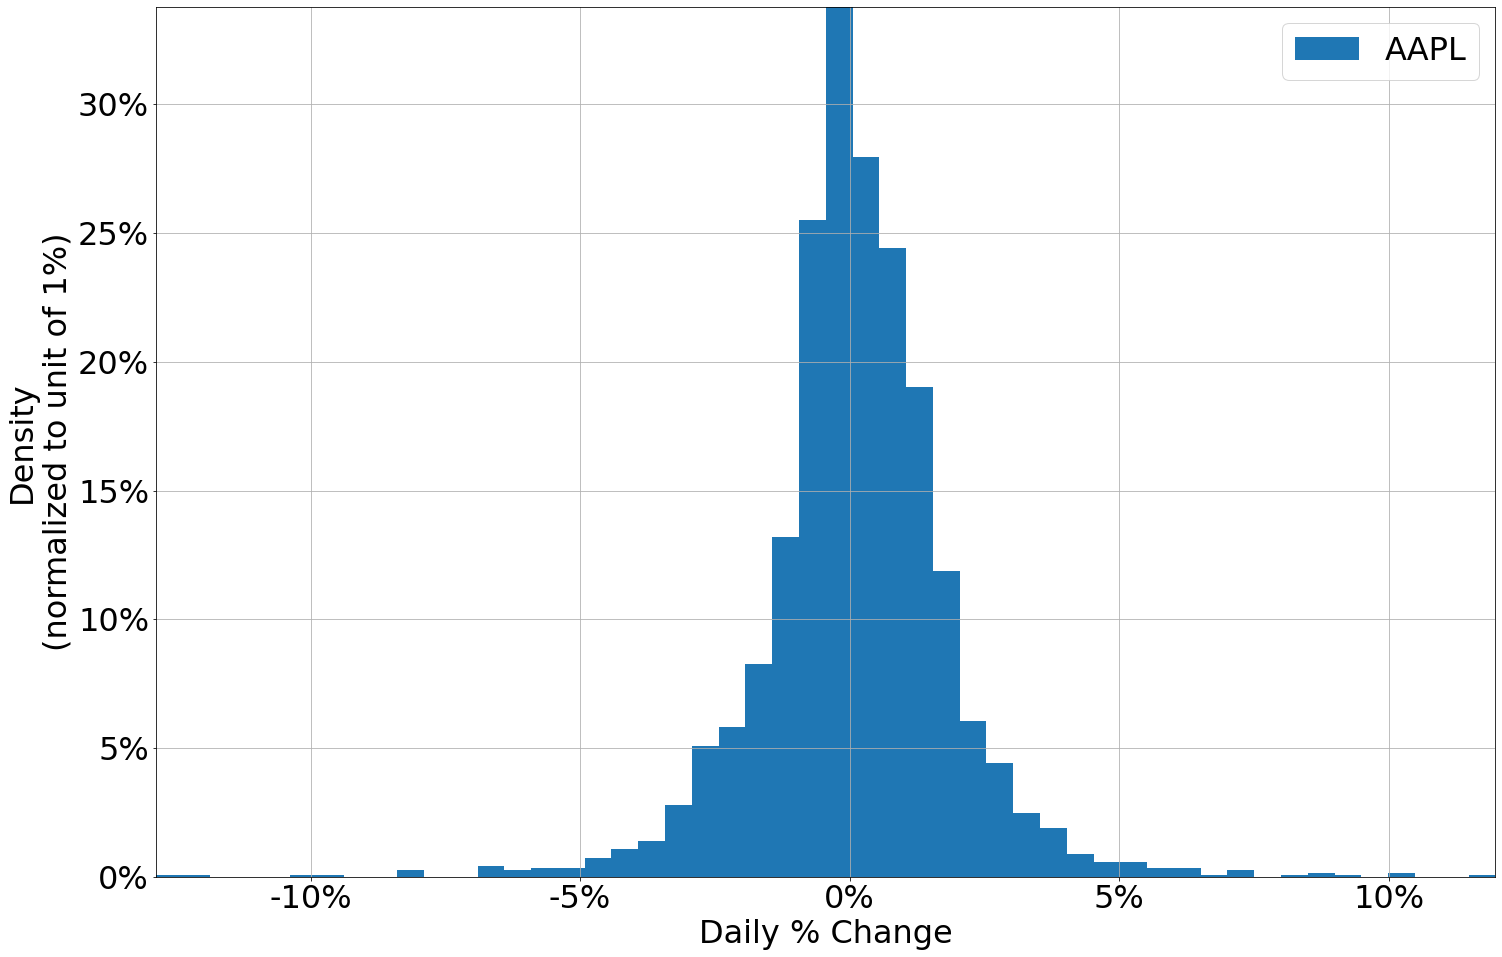

In [30]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50,
                               label = "AAPL",
                              density = True)

#set the horizntal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
ax.set_xlabel("Daily % Change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
ax.set_ylabel("Density\n(normalized to unit of 1%)")

plt.legend()
plt.show()

## create figure with multiple (4) plots

array([<AxesSubplot:title={'center':'MSFT'}>,
       <AxesSubplot:title={'center':'AAPL'}>,
       <AxesSubplot:title={'center':'FB'}>,
       <AxesSubplot:title={'center':'TSLA'}>], dtype=object)

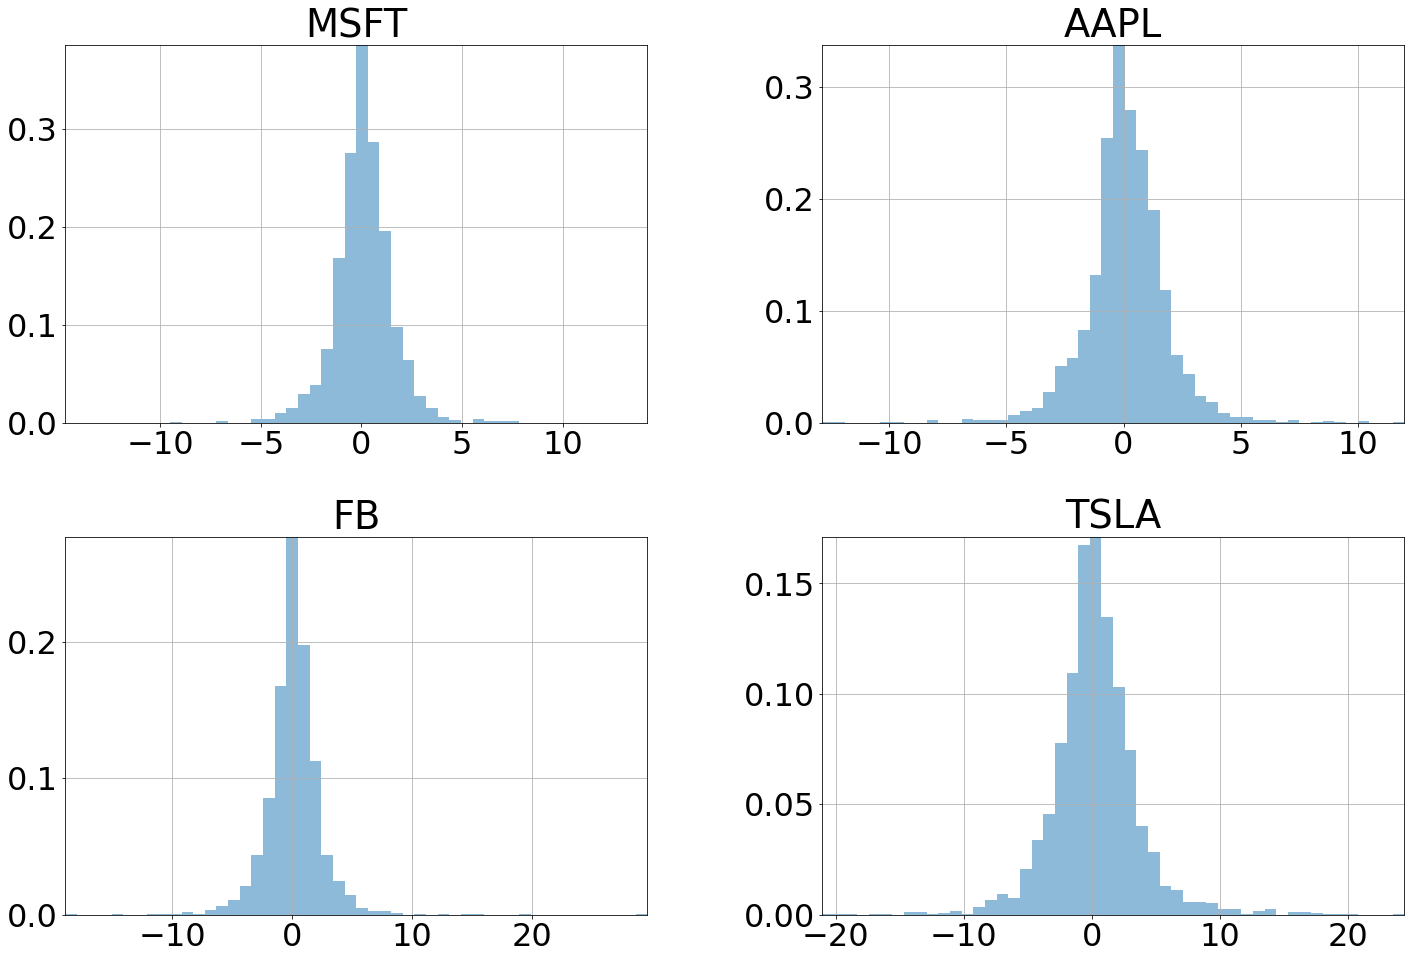

In [31]:
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins = 50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)

## Transform axis label

<ipython-input-32-3a49205ea351>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-32-3a49205ea351>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


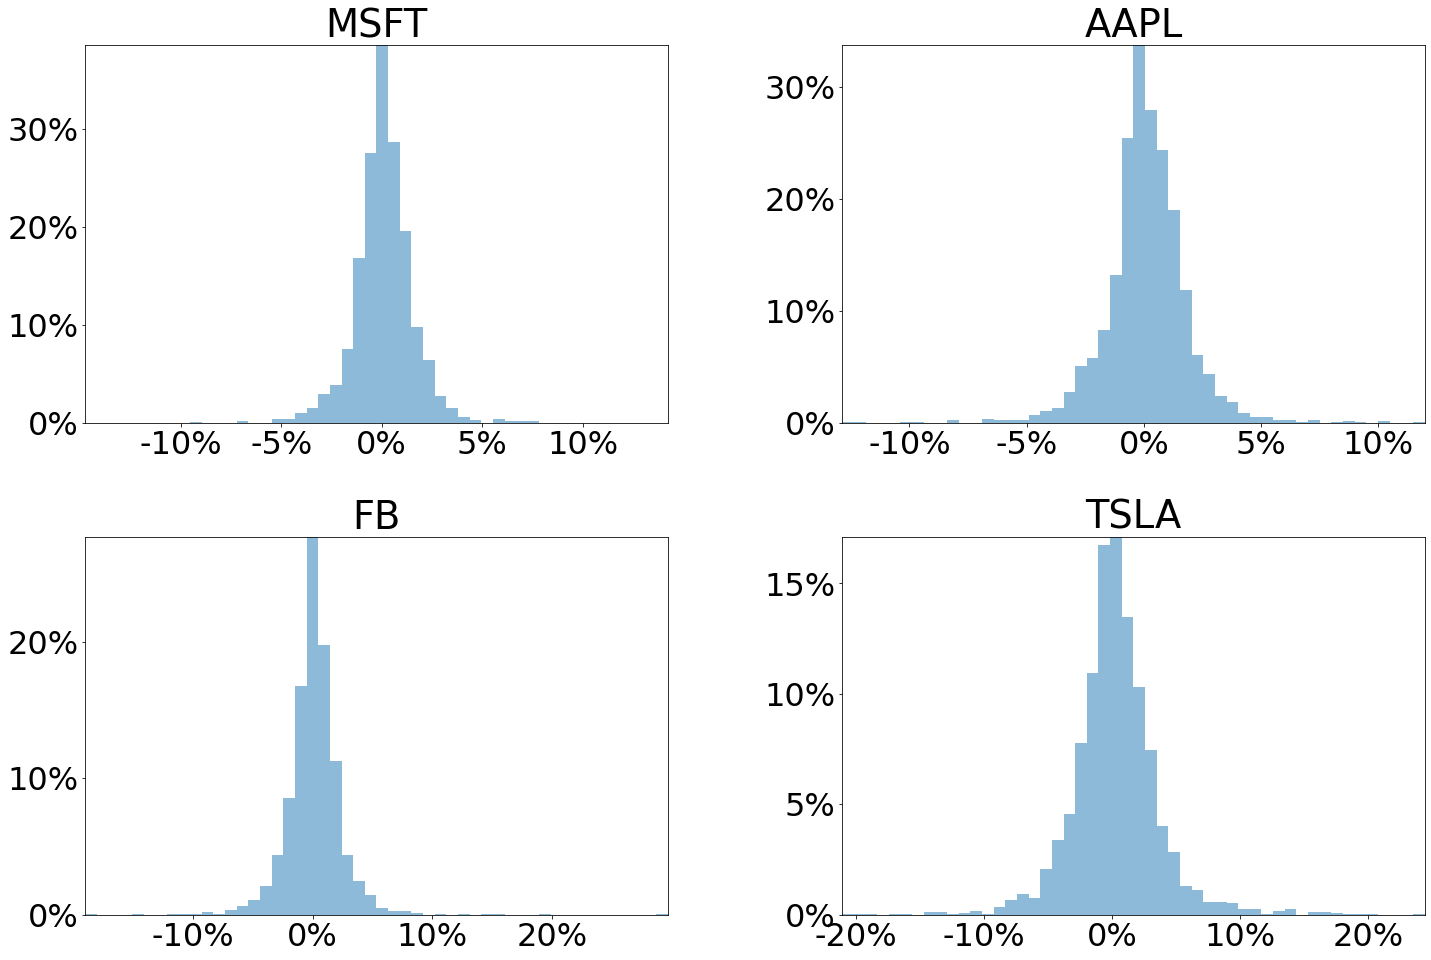

In [32]:
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins = 50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax [i][j]
        stock = a.get_title()
        a.set_title(stock)
        
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
        a.grid(False)

## Adding tables to improve the display

<ipython-input-33-4c48ce96cab8>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-33-4c48ce96cab8>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


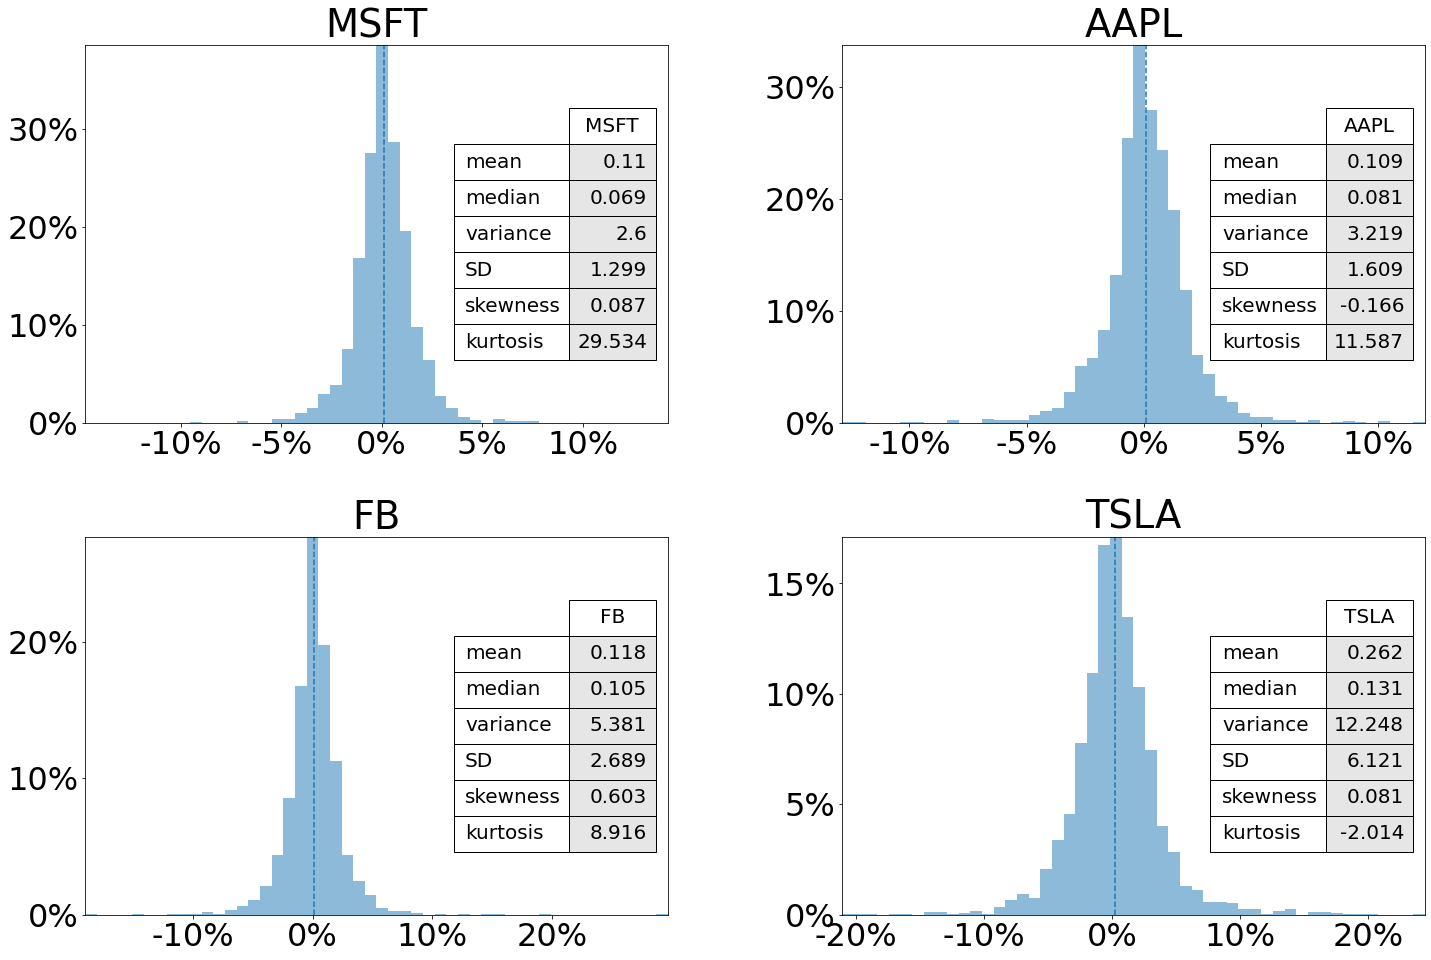

In [33]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins = 50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax [i][j]
        stock = a.get_title()
        a.set_title(stock)
        
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
        a.grid(False)
        
        hist_data = stats_df[stock]
        stats_table =table(a,
                     hist_data,
                     colWidths = [.1],
                     cellColours = [[(.9,.9,.9)]]*6,
                     loc = "center right")
        
        stats_table.scale(1.5,3)
        stats_table.auto_set_font_size(False)
        stats_table.set_fontsize(20)
        
        # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")

The next figure puts all the graphs from the various stocks together for easy comparison.

This figure seeks to display the SD and other variables around the mean which is an indicator of the riskiness and variation of the stock. A flatter tail indicates the dispersion is more and when the dispersion is close to the mean it means it is less risky

<ipython-input-34-8eac80216530>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-34-8eac80216530>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


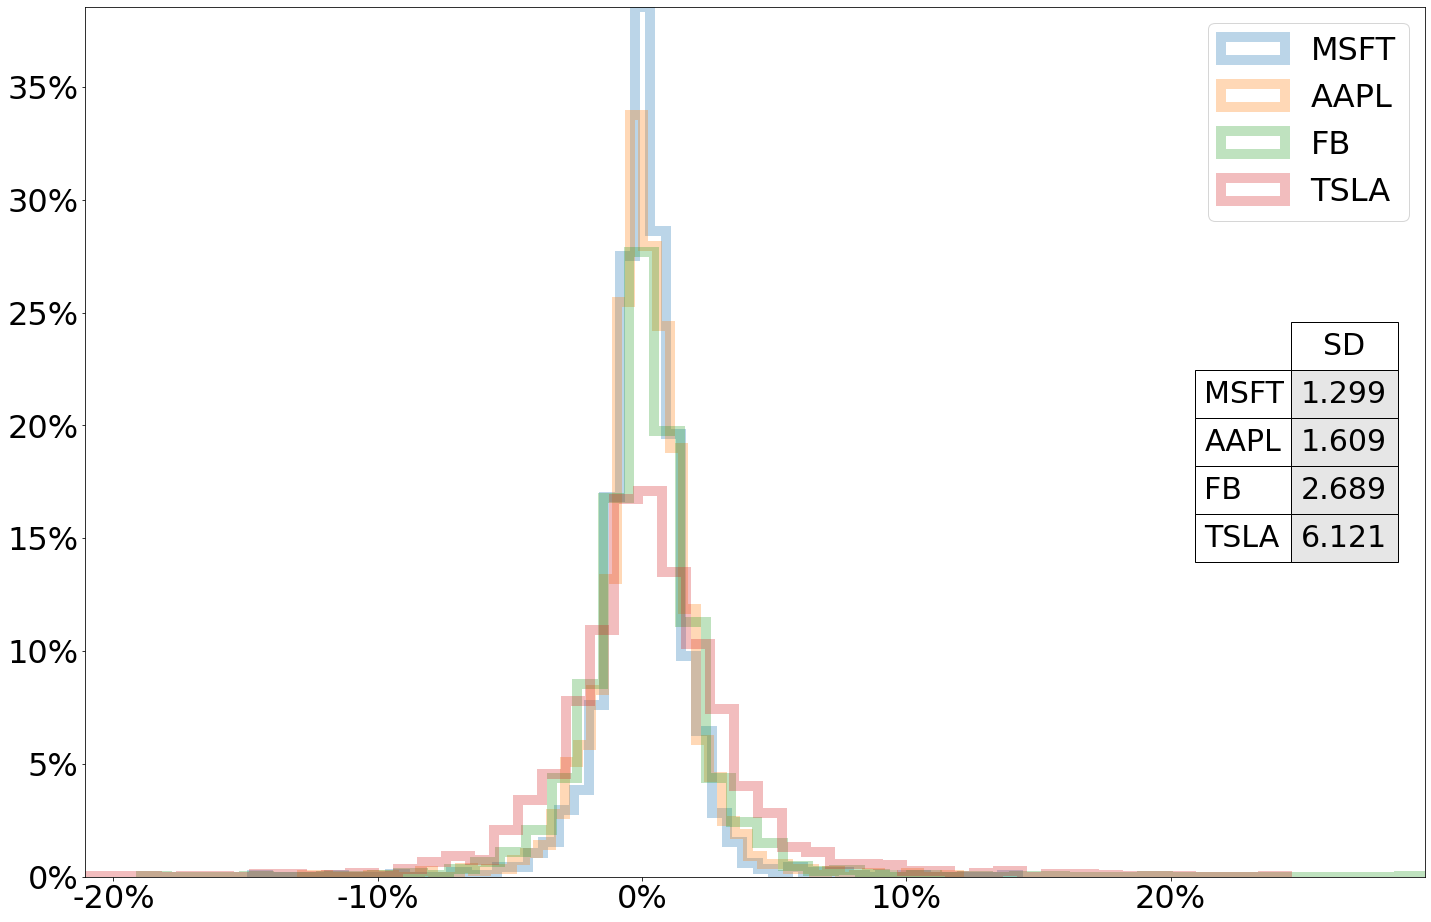

In [34]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

stats =table(ax, stats_df.loc["SD"], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

This a different style with block images

<ipython-input-35-b20045f8ac33>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-35-b20045f8ac33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


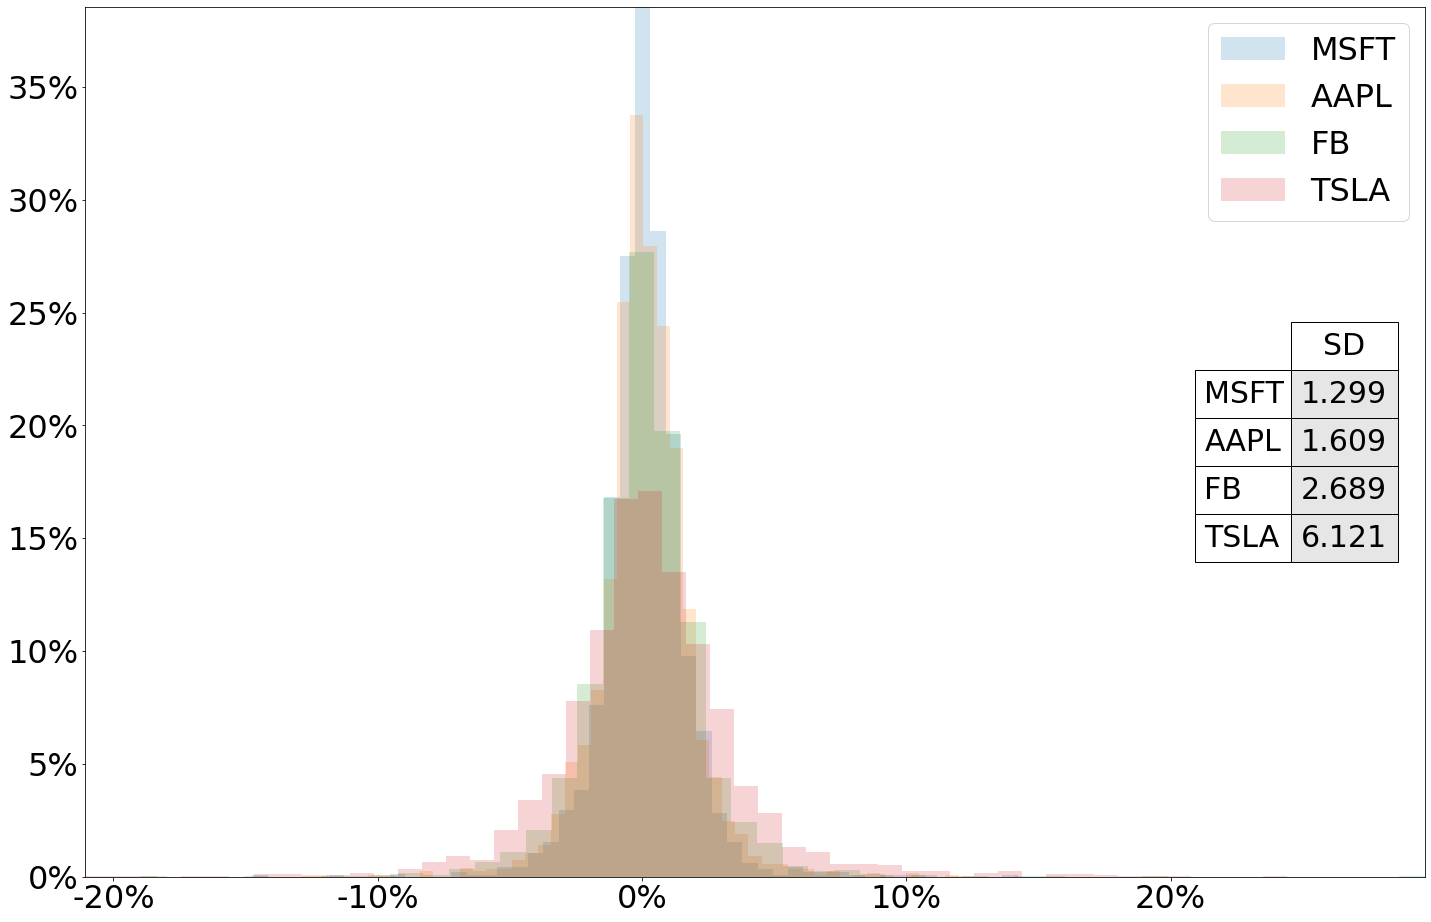

In [35]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .2, label = key, 
                                density = True)

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])

stats =table(ax, stats_df.loc["SD"], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()